In [1]:
from Model2 import RiverDeltaModel
import matplotlib.pyplot as plt
import networkx as nx
import warnings 
import copy
import matplotlib.lines as mlines

c:\Users\sjuul\anaconda3\envs\afstuderen2025\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
warnings.simplefilter("ignore")

model = RiverDeltaModel()
initial_model_state = copy.deepcopy(model) 

pos = nx.spring_layout(model.G)

for j in range(300):
    model.step()

This farm failed due to antibiotic use
This farm failed due to antibiotic use
This farm failed due to antibiotic use
This farm failed due to antibiotic use
This farm failed due to antibiotic use
This farm failed due to antibiotic use
This farm failed due to antibiotic use
shock is happening!!
This farm failed due to antibiotic use
This farm failed due to antibiotic use
This farm failed due to antibiotic use
This farm failed due to antibiotic use
This farm failed due to antibiotic use
This farm failed due to antibiotic use
This farm failed due to antibiotic use
This farm failed due to antibiotic use
This farm failed due to antibiotic use
This farm failed due to antibiotic use
This farm failed due to antibiotic use
This farm failed due to antibiotic use
This farm failed due to antibiotic use
This farm failed due to antibiotic use
This farm failed due to antibiotic use
This farm failed due to antibiotic use
This farm failed due to antibiotic use
This farm failed due to antibiotic use
This

In [3]:
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data = agent_data.xs(288, level="Step")
#agent_data = agent_data[agent_data["Agent_type"] == "Agri_small_saline"]
agent_data = agent_data[agent_data['Agent_type'] != "migrated"]
agent_data

,Agent_type,Age,Salinity,Savings,Loan_size,maximum_debt,income,abilities,current_crop,New crop
AgentID,,,,,,,,,,
10,Agri_small_saline,"[7, 8, 30, 32, 33, 51, 52]",6.877963,5180.061983,1650.237758,10240.215122,8881.354278,"[{'strategy': 'Rice', 'FA': 1, 'IA': 1, 'TA': ...",Coconut,Coconut
26,Agri_small_saline,"[69, 73]",4.229786,-130322.259025,0.000000,11060.234351,0.000000,"[{'strategy': 'Rice', 'FA': 1, 'IA': 1, 'TA': ...",Rice,Rice
29,Agri_small_saline,"[4, 5, 7, 9, 33, 34, 37, 64, 68]",6.922324,-177782.279860,3468.970334,5542.827563,4154.934550,"[{'strategy': 'Rice', 'FA': 0, 'IA': 1, 'TA': ...",Coconut,Coconut
34,Agri_small_saline,"[1, 2, 28, 29, 32, 52, 57]",10.769867,-212968.811724,2802.968756,4914.894129,1914.853620,"[{'strategy': 'Rice', 'FA': 0, 'IA': 1, 'TA': ...",Coconut,Coconut
109,Aqua_small_saline,"[4, 9, 12, 13, 32, 60, 61]",8.630657,163026.899562,0.000000,9818.530735,3733.129898,None,Shrimp,None
110,Aqua_small_saline,"[8, 35, 38, 41, 42, 66, 71]",6.645084,-27547.016068,0.000000,6703.732092,5722.278858,None,Shrimp,None
115,Aqua_small_saline,"[1, 5, 10, 30, 35, 66, 69]",8.899355,122015.388281,0.000000,9717.348986,6963.566556,None,Shrimp,None
122,Aqua_small_saline,"[3, 4, 23, 52, 58]",5.489642,107221.151749,0.000000,6515.699291,3371.156406,None,Shrimp,None
129,Aqua_small_saline,"[0, 29, 51, 53, 76]",4.974290,-38761.040693,0.000000,7479.520352,449.520106,None,Shrimp,None


### PLOT AGENTS ON THE MAP

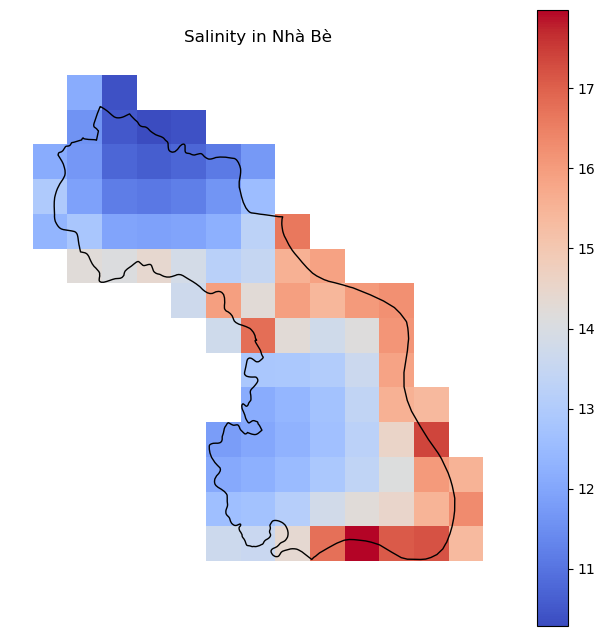

In [4]:
fig, ax = plt.subplots(figsize=(8, 8))
model.polygon_districts.boundary.plot(ax=ax, color='black', linewidth=1)
model.data_salinity.plot(ax=ax, column="Salinity", cmap="coolwarm", legend=True)
plt.title(f"Salinity in {model.district}")
plt.axis("off")
plt.show()

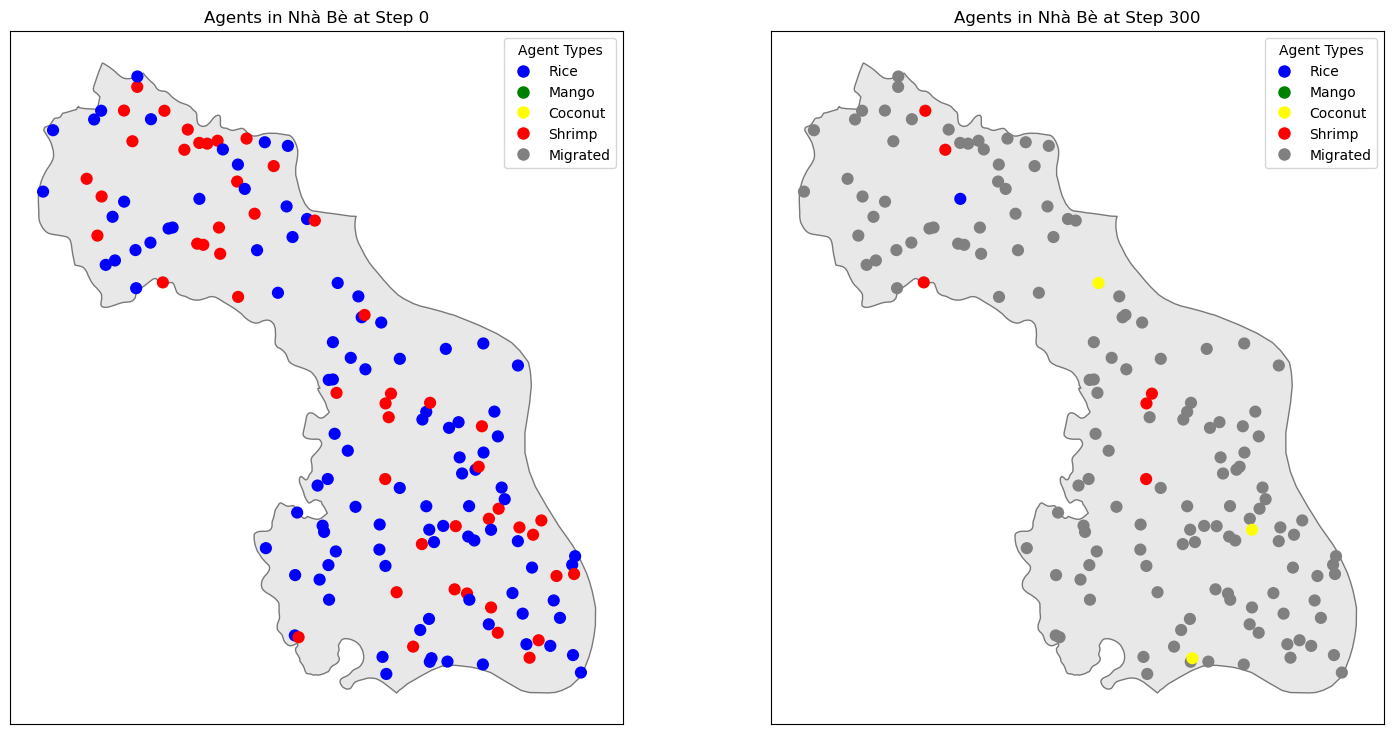

In [5]:
from Model2 import Agri_farmer, Aqua_farmer

def plot_network(ax, model):
    ax.clear()

    # Plot district map
    model.polygon_districts.plot(ax=ax, facecolor="lightgray", edgecolor="black", alpha=0.5)

    # Get node positions
    pos = nx.get_node_attributes(model.G, 'pos')

    # Map node_id to agent
    node_to_agent = {
        agent.node_id: agent
        for agent in model.agents
        if isinstance(agent, (Agri_farmer, Aqua_farmer))
    }

    # Prepare lists for nodes and their colors
    nodes_to_draw = []
    colors_to_draw = []

    for node_id in model.G.nodes():
        nodes_to_draw.append(node_id)
        agent = node_to_agent.get(node_id)
        if agent:
            if agent.current_crop == "Rice":
                colors_to_draw.append('blue')
            elif agent.current_crop == "Mango":
                colors_to_draw.append('green')
            elif agent.current_crop == "Coconut":
                colors_to_draw.append('yellow')
            elif agent.current_crop == "Shrimp":
                colors_to_draw.append('red')
            else:
                colors_to_draw.append("gray")  # unknown crop
        else:
            colors_to_draw.append("gray")  # migrated / no agent

    # Draw edges first (optional)
    #nx.draw_networkx_edges(model.G, pos, ax=ax, edge_color="gray")

    # Draw nodes with matching colors
    nx.draw_networkx_nodes(model.G, pos,
                           nodelist=nodes_to_draw,
                           node_color=colors_to_draw,
                           node_size=60,
                           ax=ax)

    # Add legend
    blue_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Rice')
    green_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='green', markersize=10, label='Mango')
    yellow_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Coconut')
    red_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='red', markersize=10, label='Shrimp')
    grey_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='gray', markersize=10, label='Migrated')
    ax.legend(handles=[blue_patch, green_patch, yellow_patch, red_patch, grey_patch], loc='upper right', title='Agent Types')

    ax.set_title(f"Agents in {model.district} at Step {model.steps}", fontsize=12)

    # Call function above to plot the map
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18, 9))
plot_network(ax1, initial_model_state)
plot_network(ax2, model)
plt.show()
